In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


df_unfiltered = pd.read_csv('../../data/processed/credit_risk_dataset_processed.csv')

df = df_unfiltered[df_unfiltered['person_age'] < 100]
# print(df.head())

print(df.describe())

         person_age  person_income  person_emp_length     loan_amnt  \
count  28495.000000   2.849500e+04       28495.000000  28495.000000   
mean      27.723530   6.643047e+04           4.781751   9657.366205   
std        6.177199   5.151374e+04           4.037958   6327.711290   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.948000e+04           2.000000   5000.000000   
50%       26.000000   5.600000e+04           4.000000   8000.000000   
75%       30.000000   8.000000e+04           7.000000  12500.000000   
max       84.000000   2.039784e+06          41.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   28495.000000  28495.000000         28495.000000   
mean       11.045220      0.217126             0.169517   
std         3.230786      0.412296             0.106379   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%   

In [17]:
numeric_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'person_credit_history']

categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade','person_credit_default']



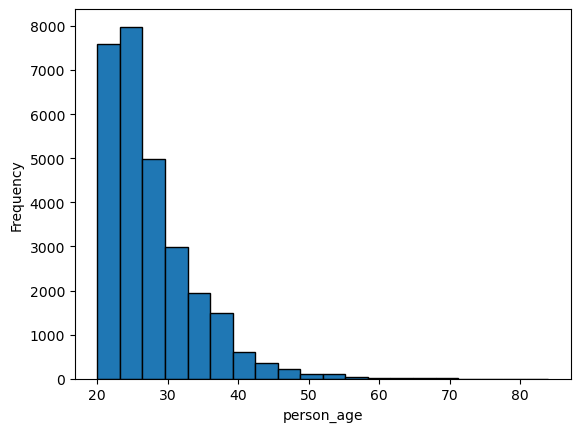

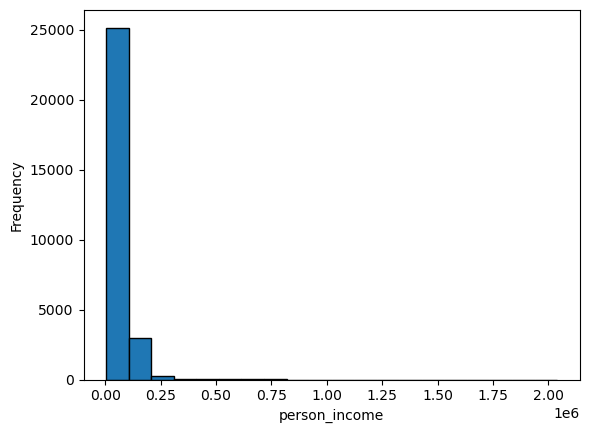

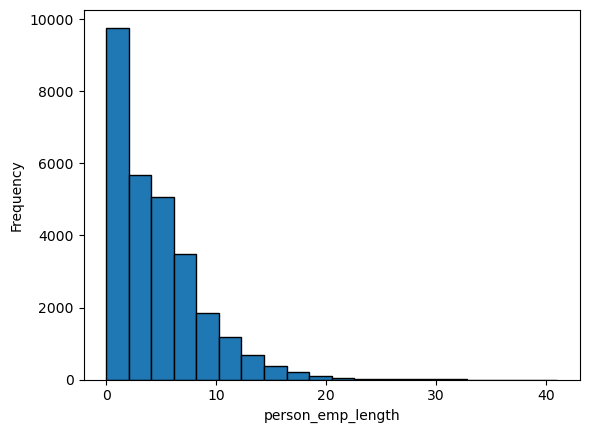

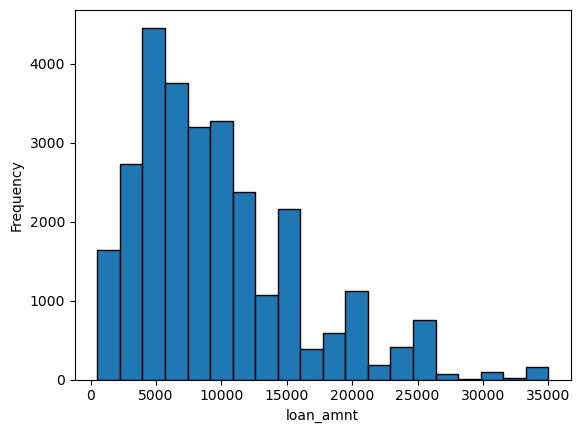

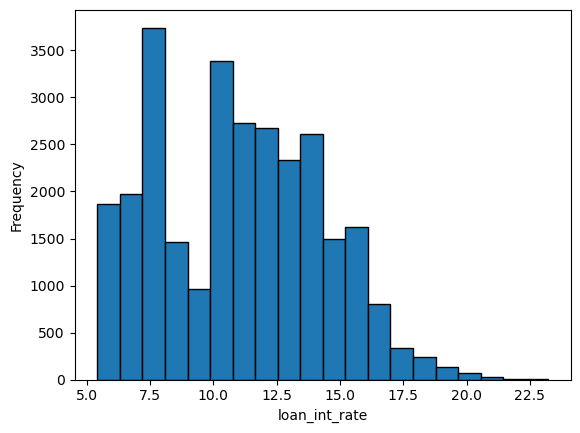

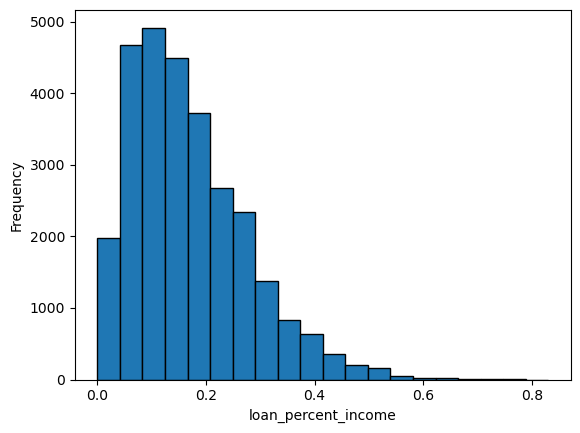

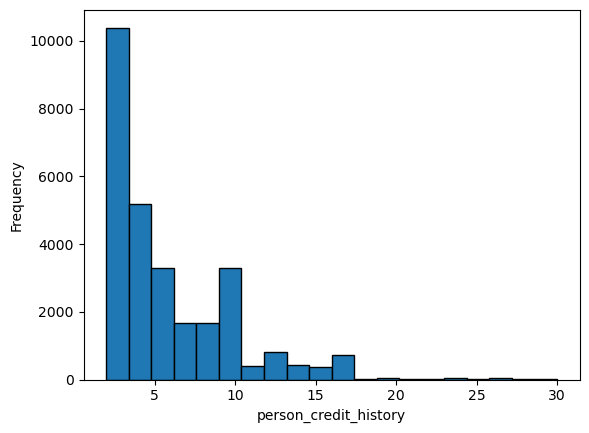

In [24]:
for feature in numeric_features:
    plt.hist(df[feature], bins=20, edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

    '''These histograms illustrate the distribution of values for each numerical feature, 
    providing insights into their frequency and spread across the dataset'''

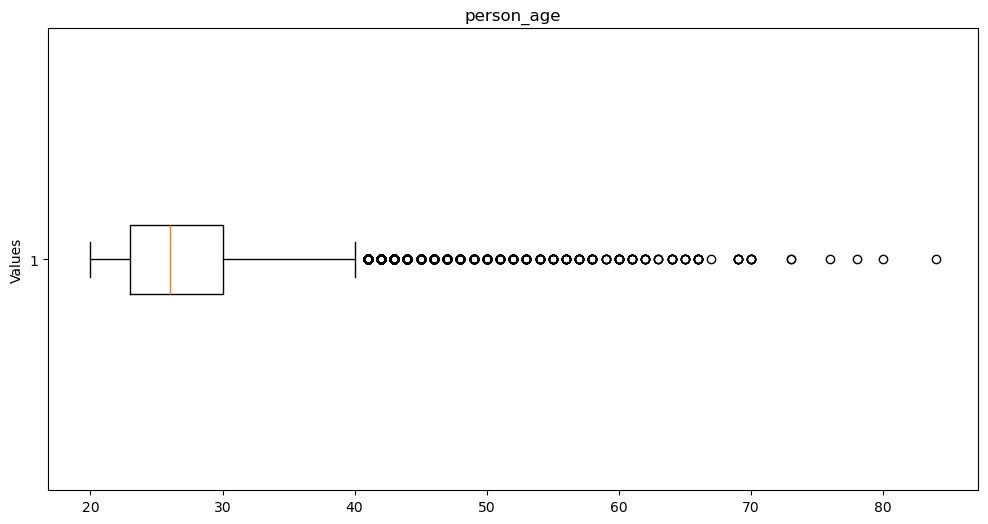

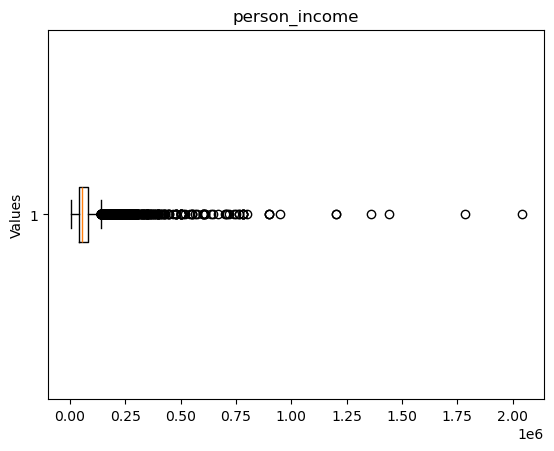

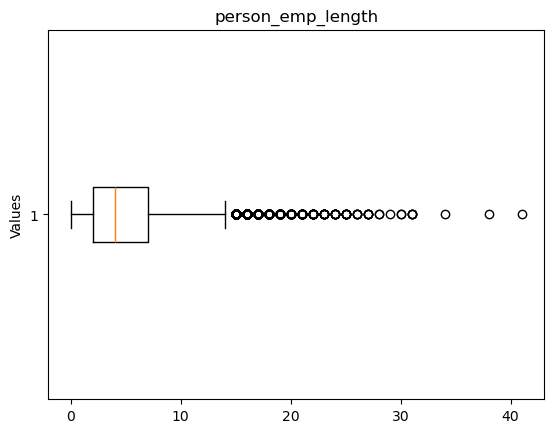

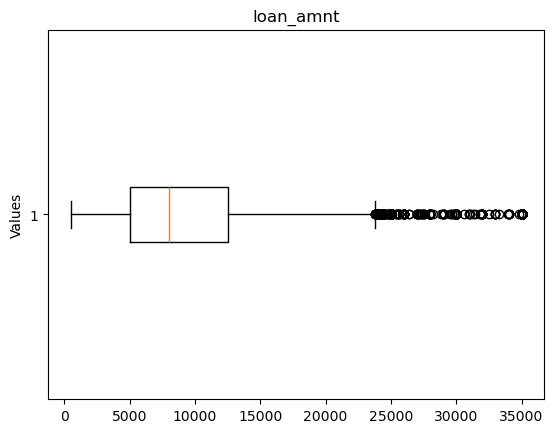

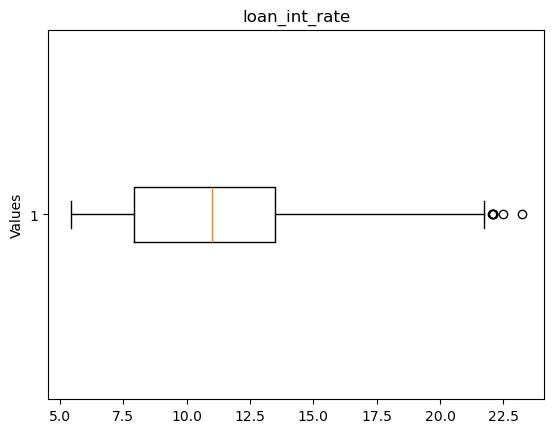

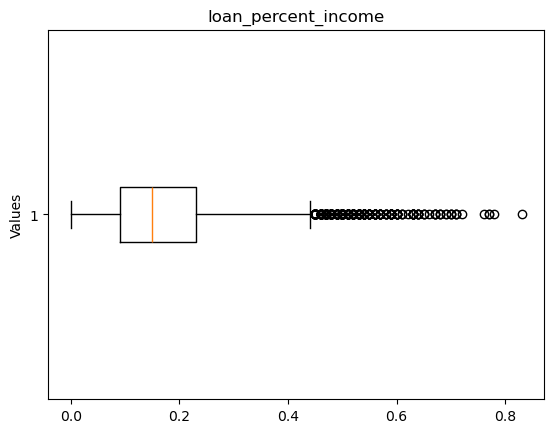

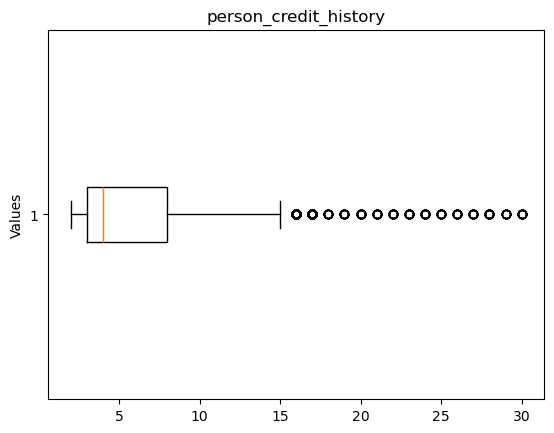

In [19]:
plt.figure(figsize=(12, 6))

for feature in numeric_features:
    plt.boxplot(df[feature],vert=False)
    plt.title(feature)
    plt.ylabel('Values')
    plt.show()

    '''In analyzing our dataset, we encountered potential outliers across several key features such as age and interest rates.
      It's crucial to recognize that outliers often represent genuine data points reflecting extreme but plausible scenarios. 
      Removing outliers without careful consideration can introduce bias and undermine the model's ability to generalize to diverse real-world situations. 
      Therefore, we opted to retain these outliers to ensure our model remains robust and can handle a wide range of conditions. '''

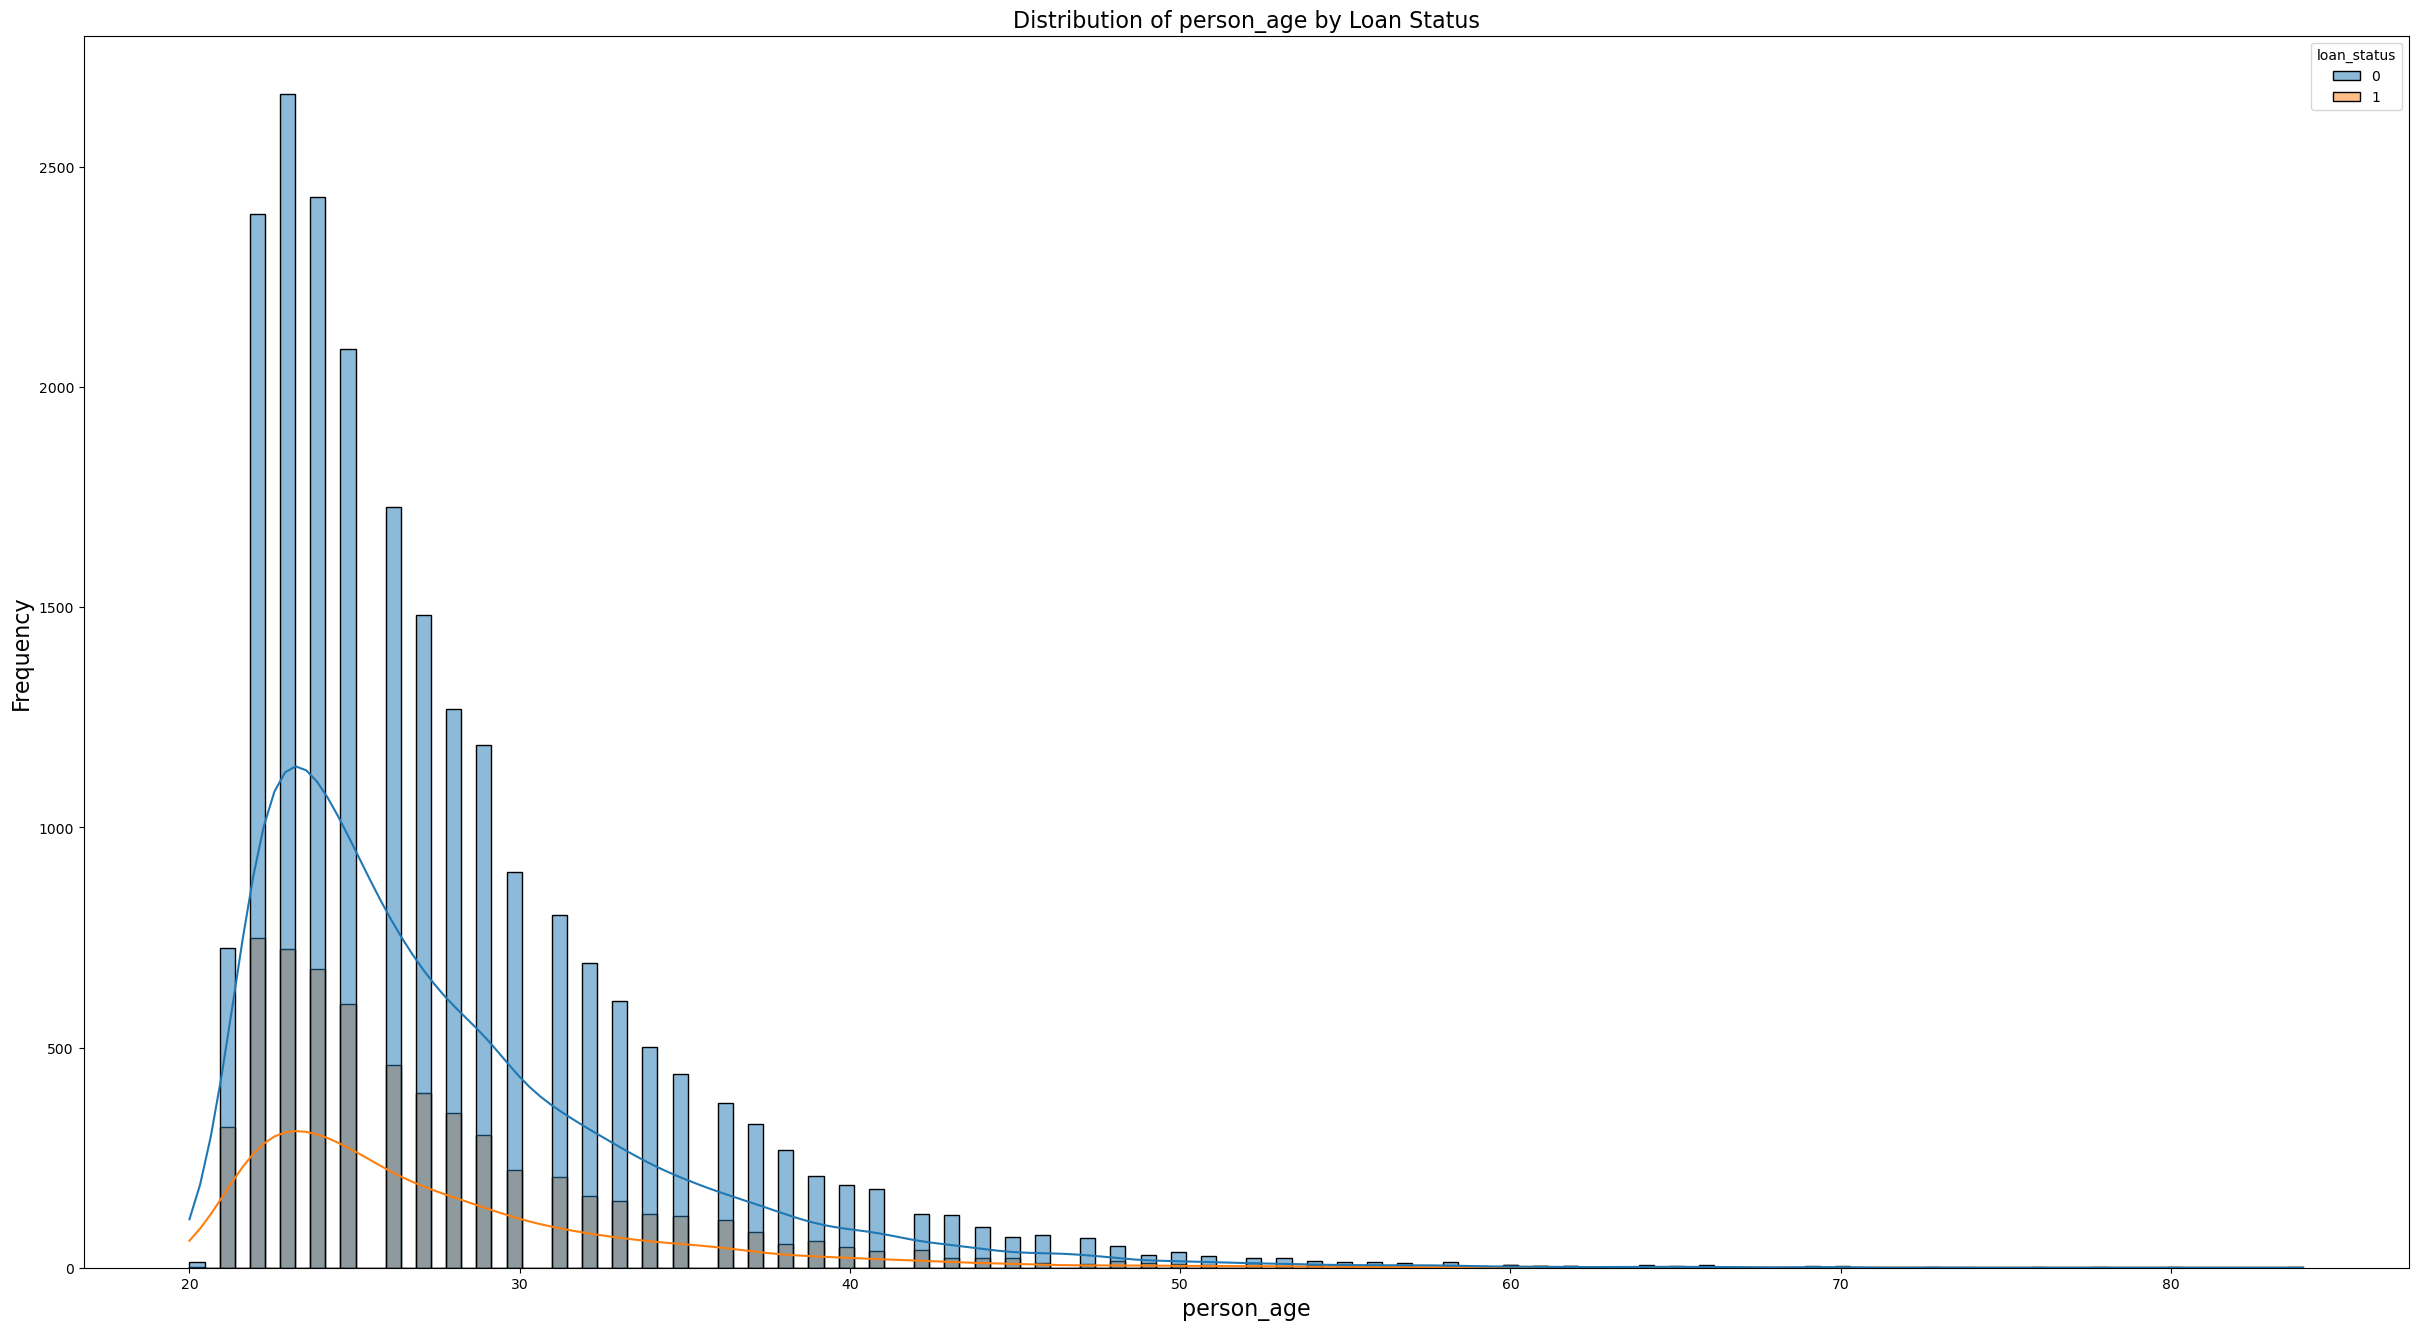

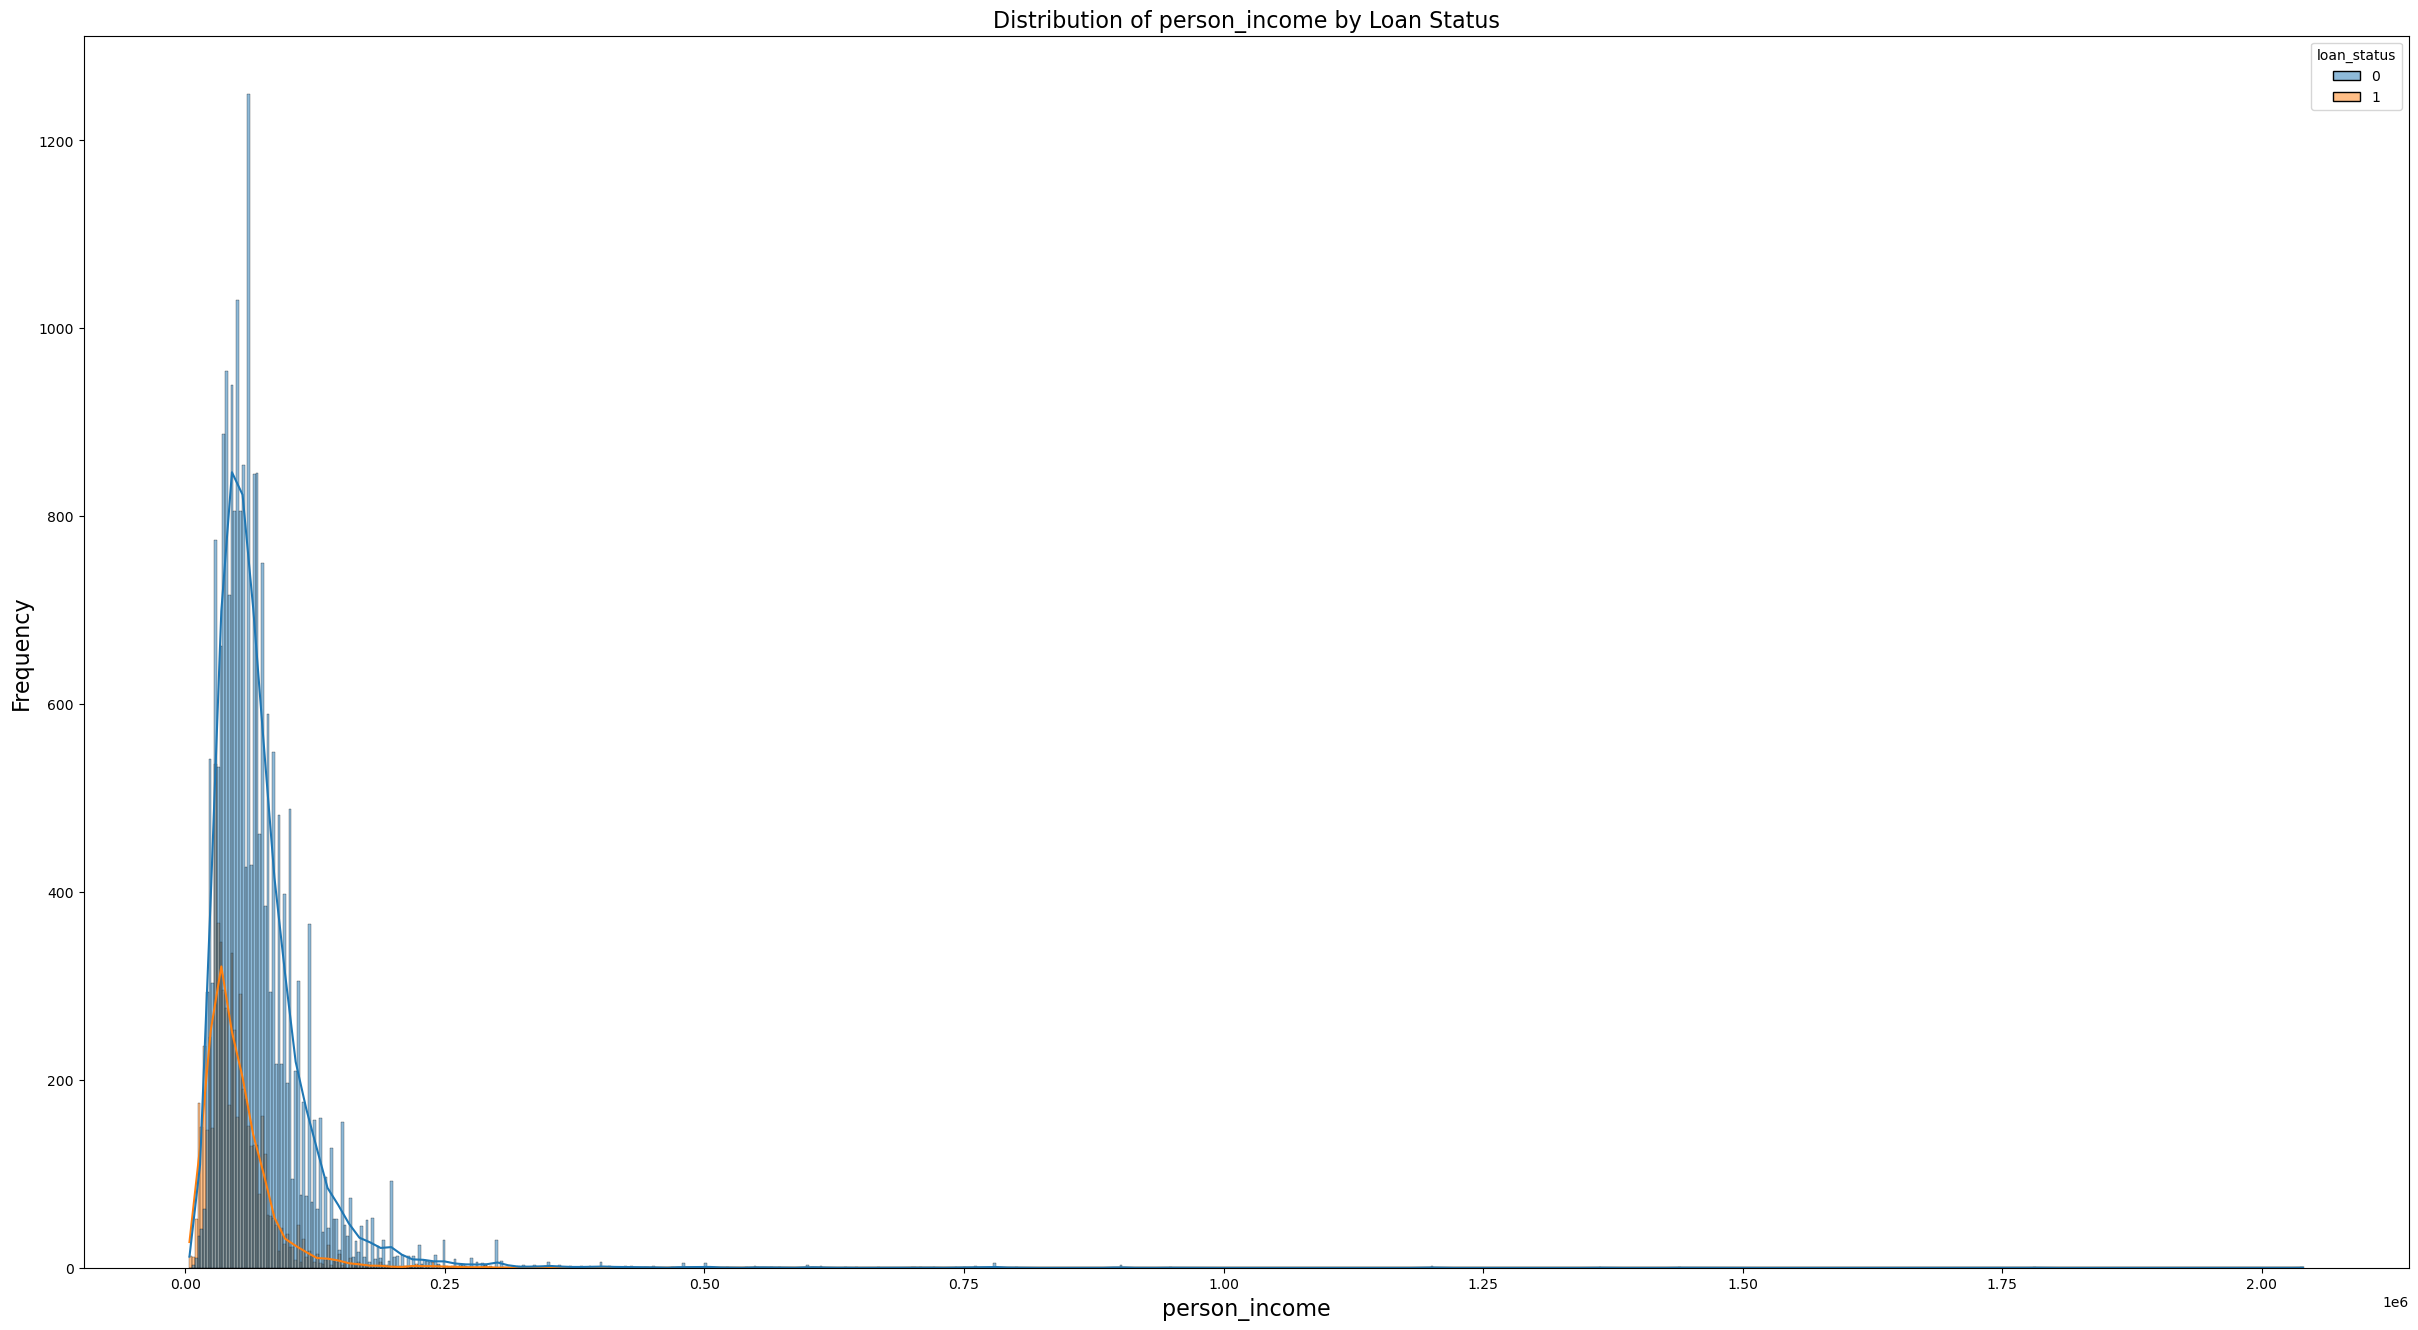

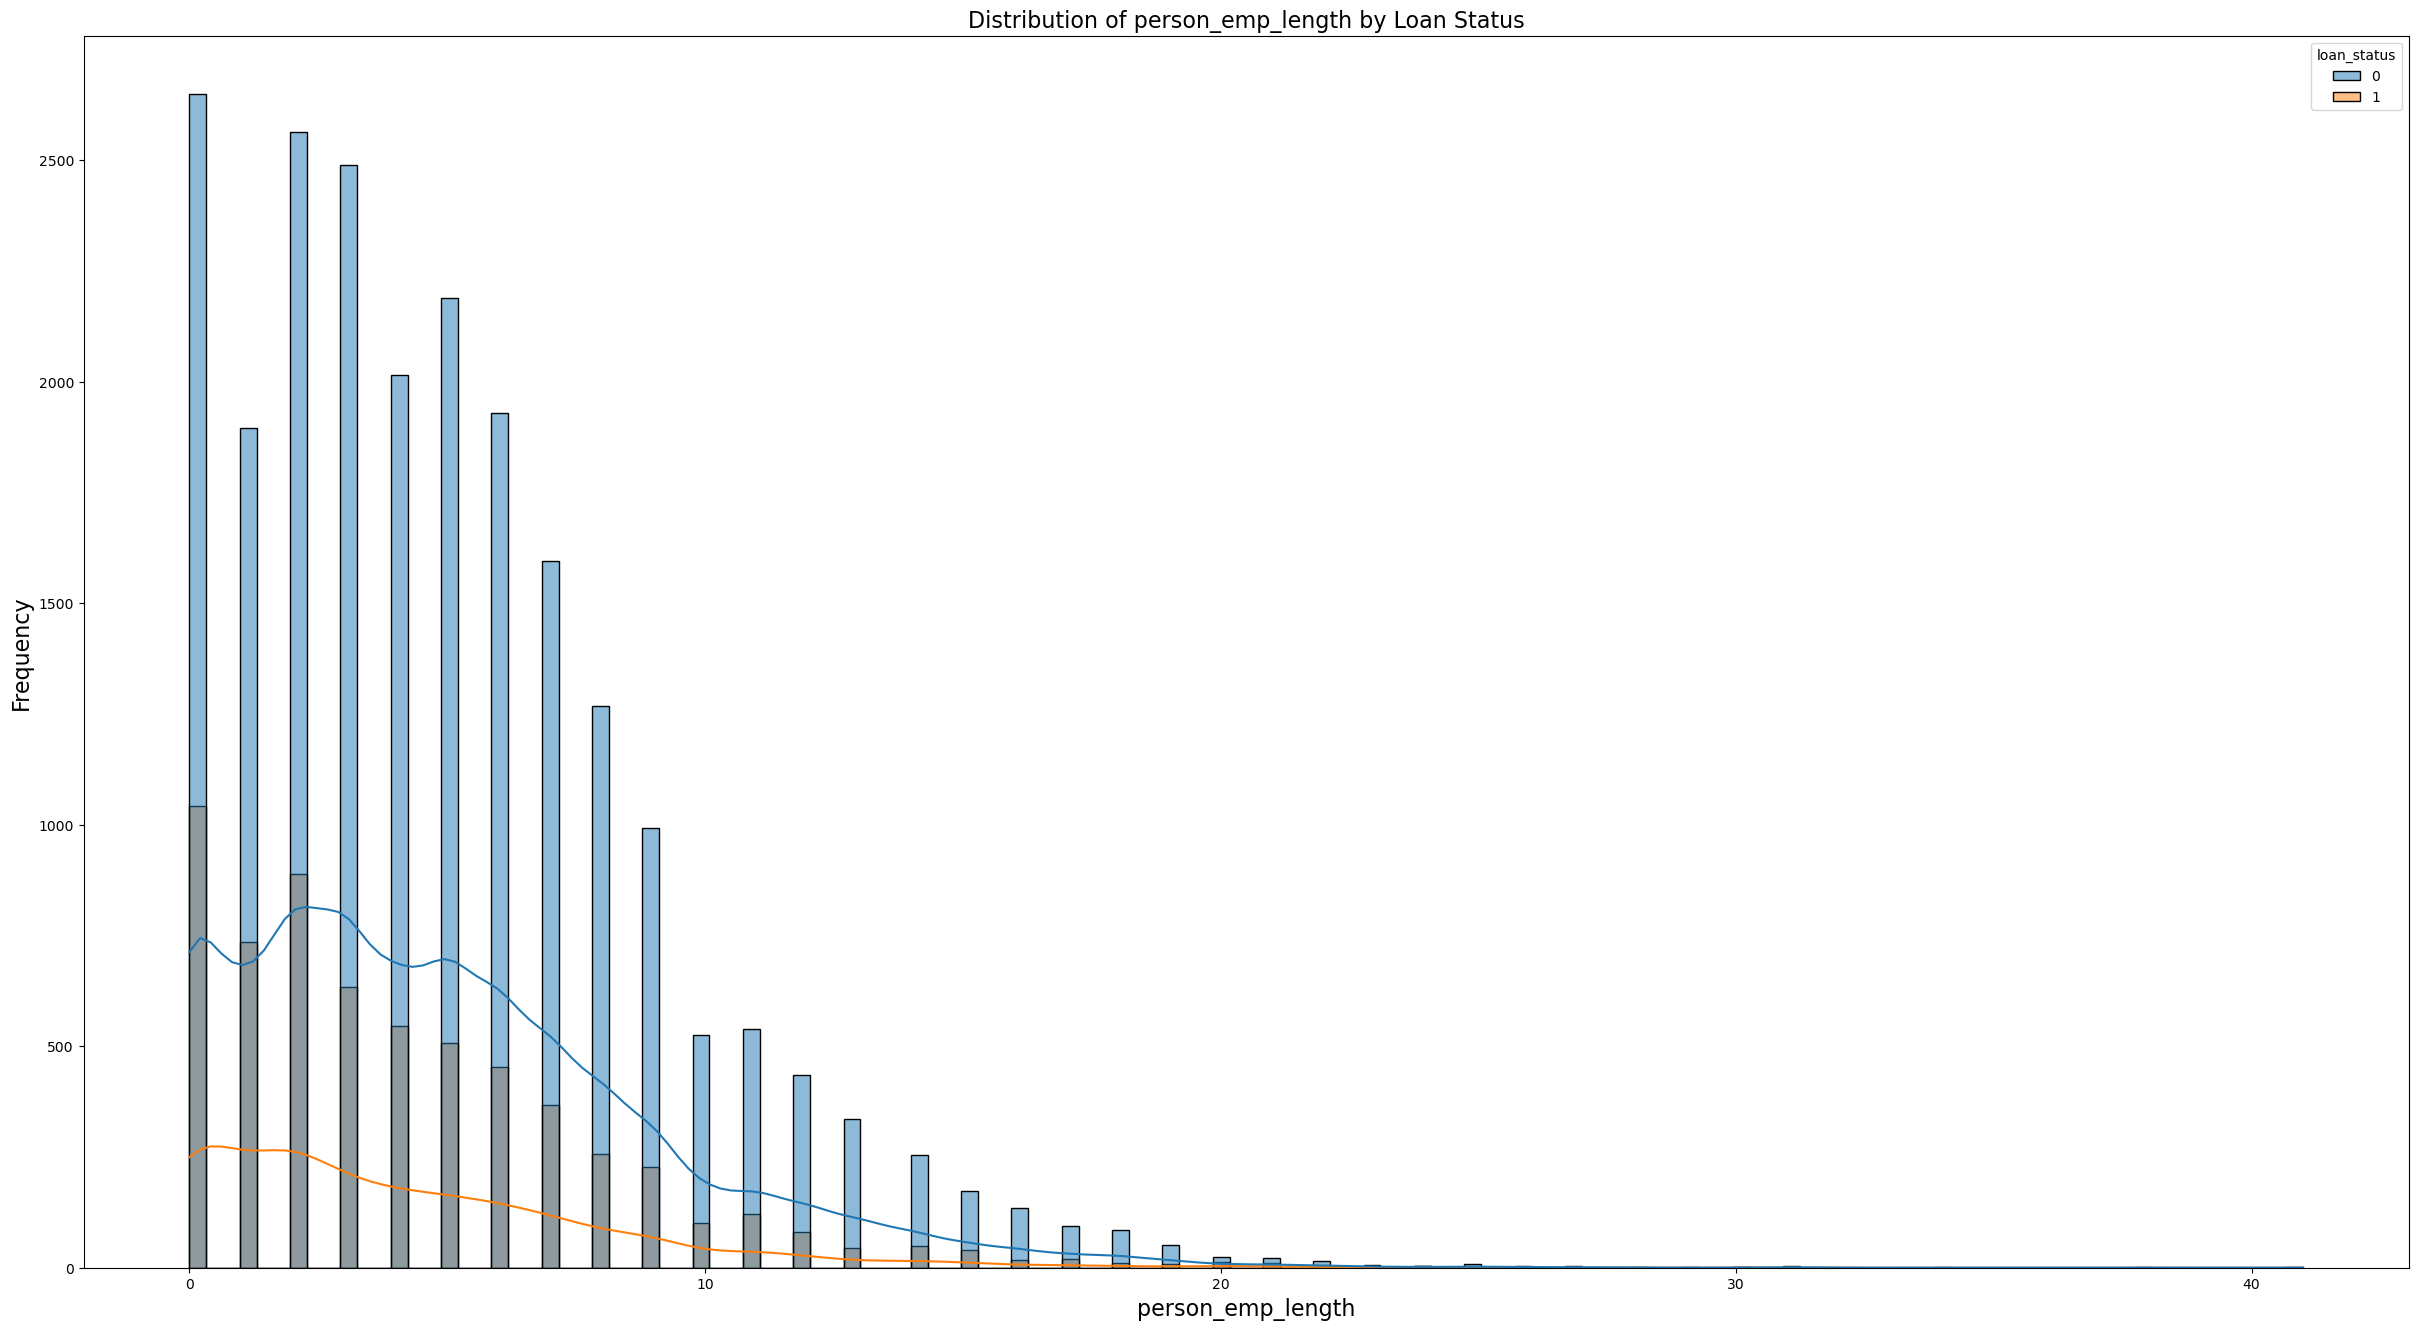

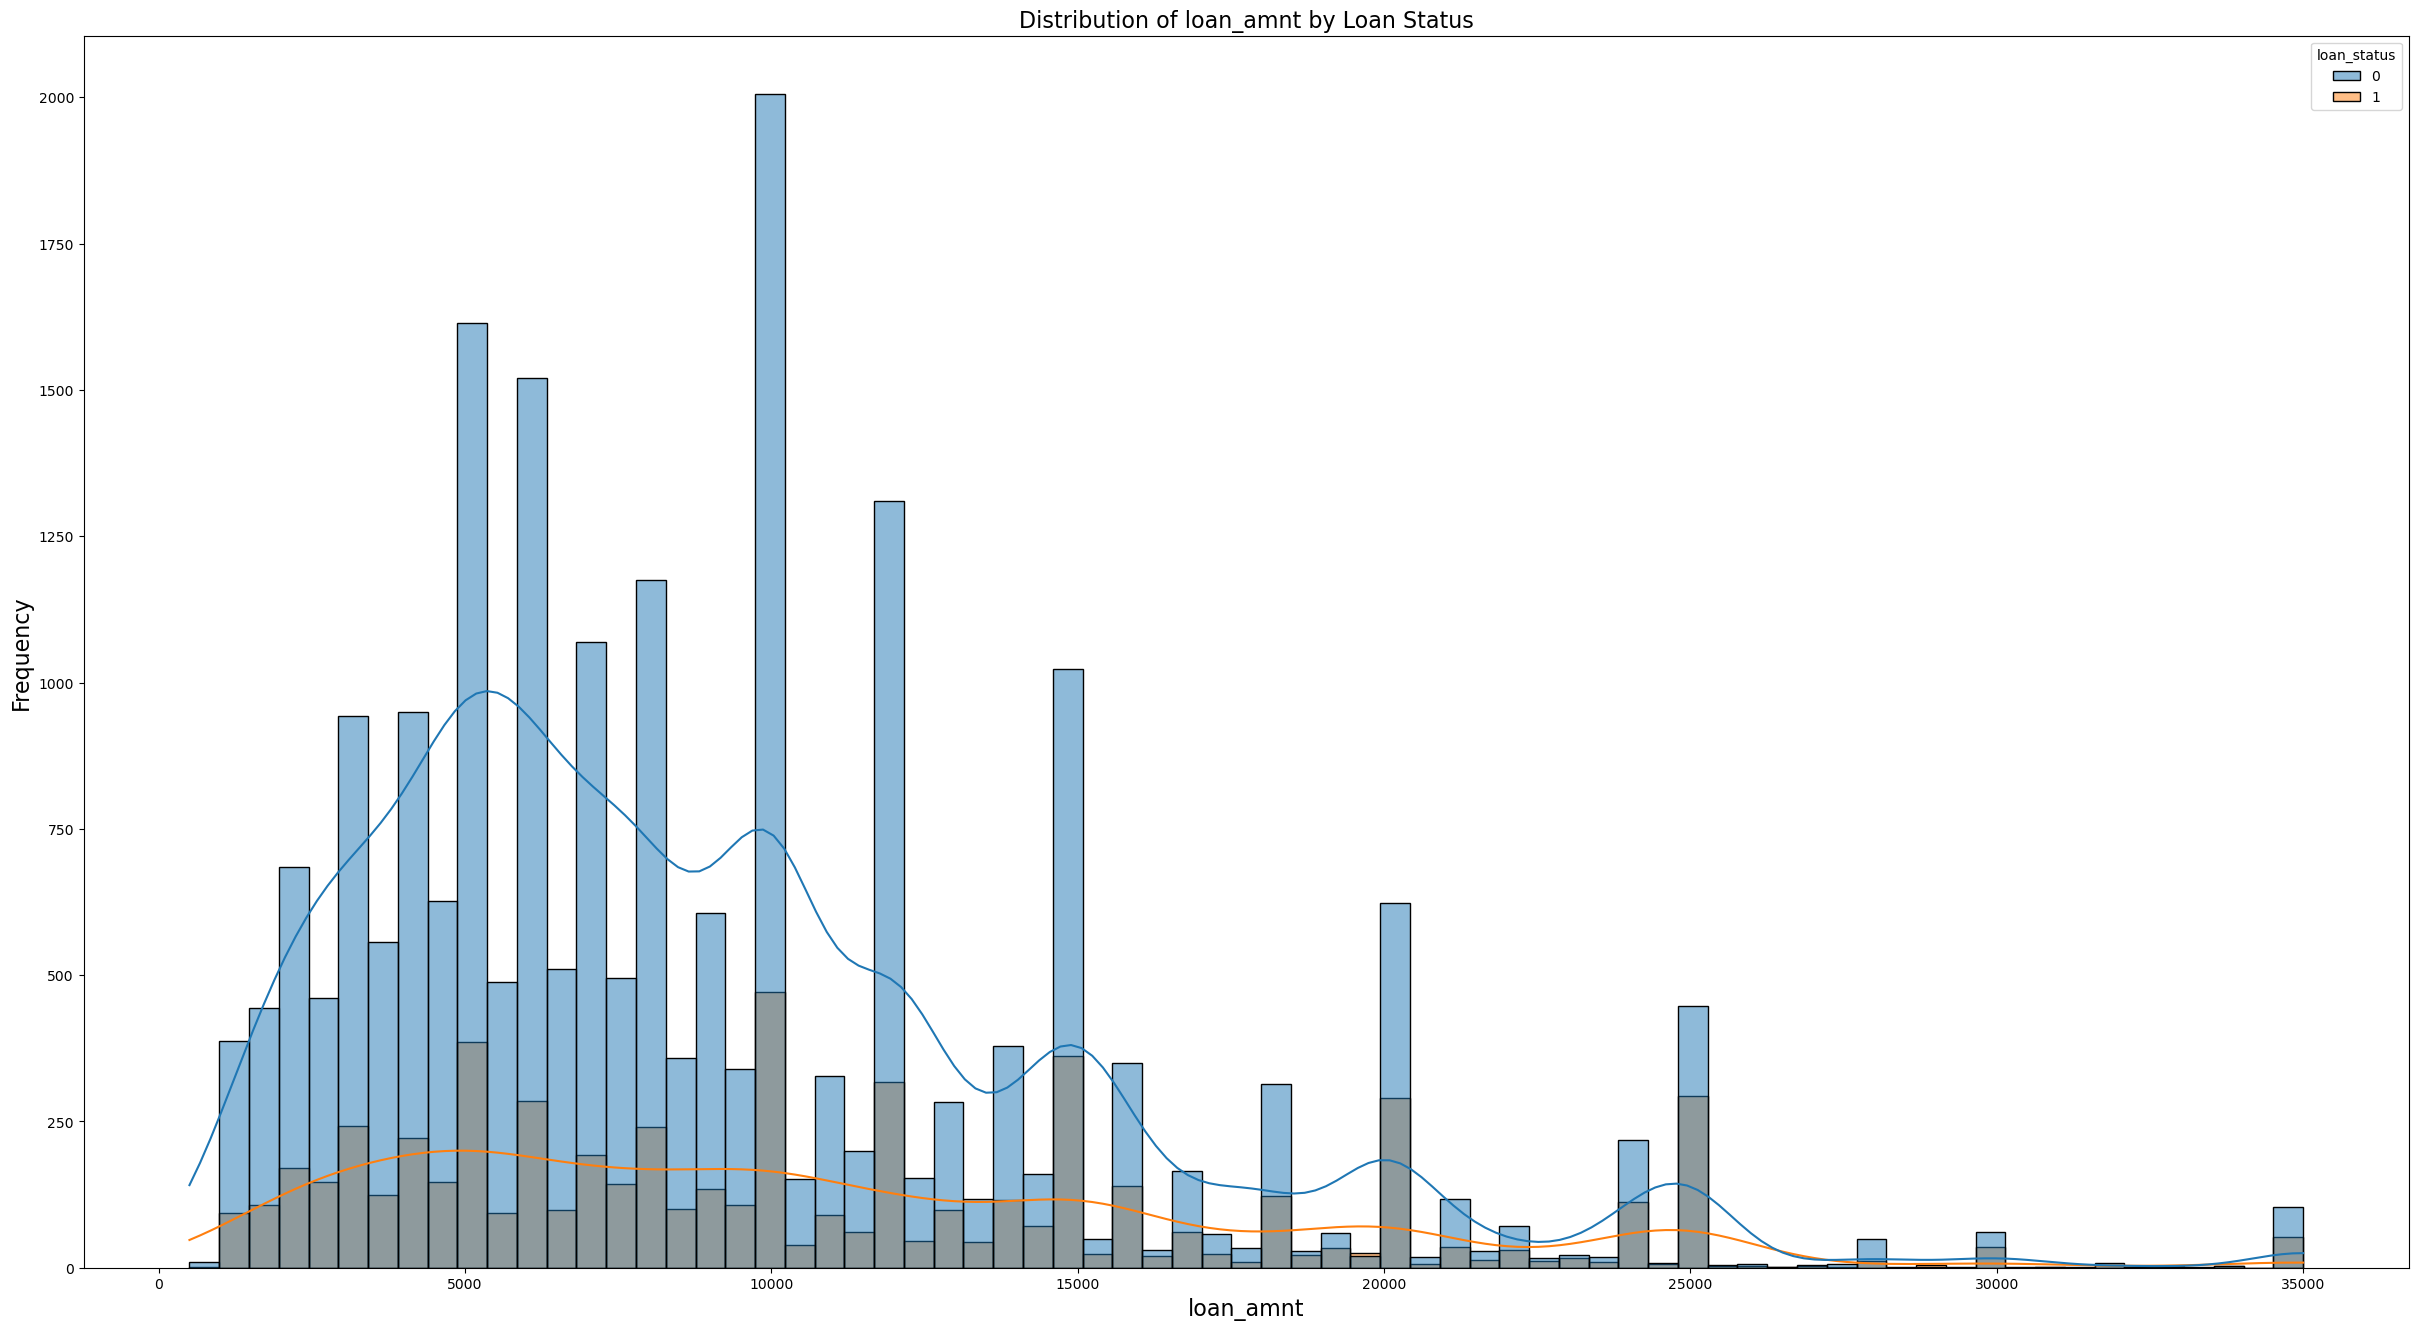

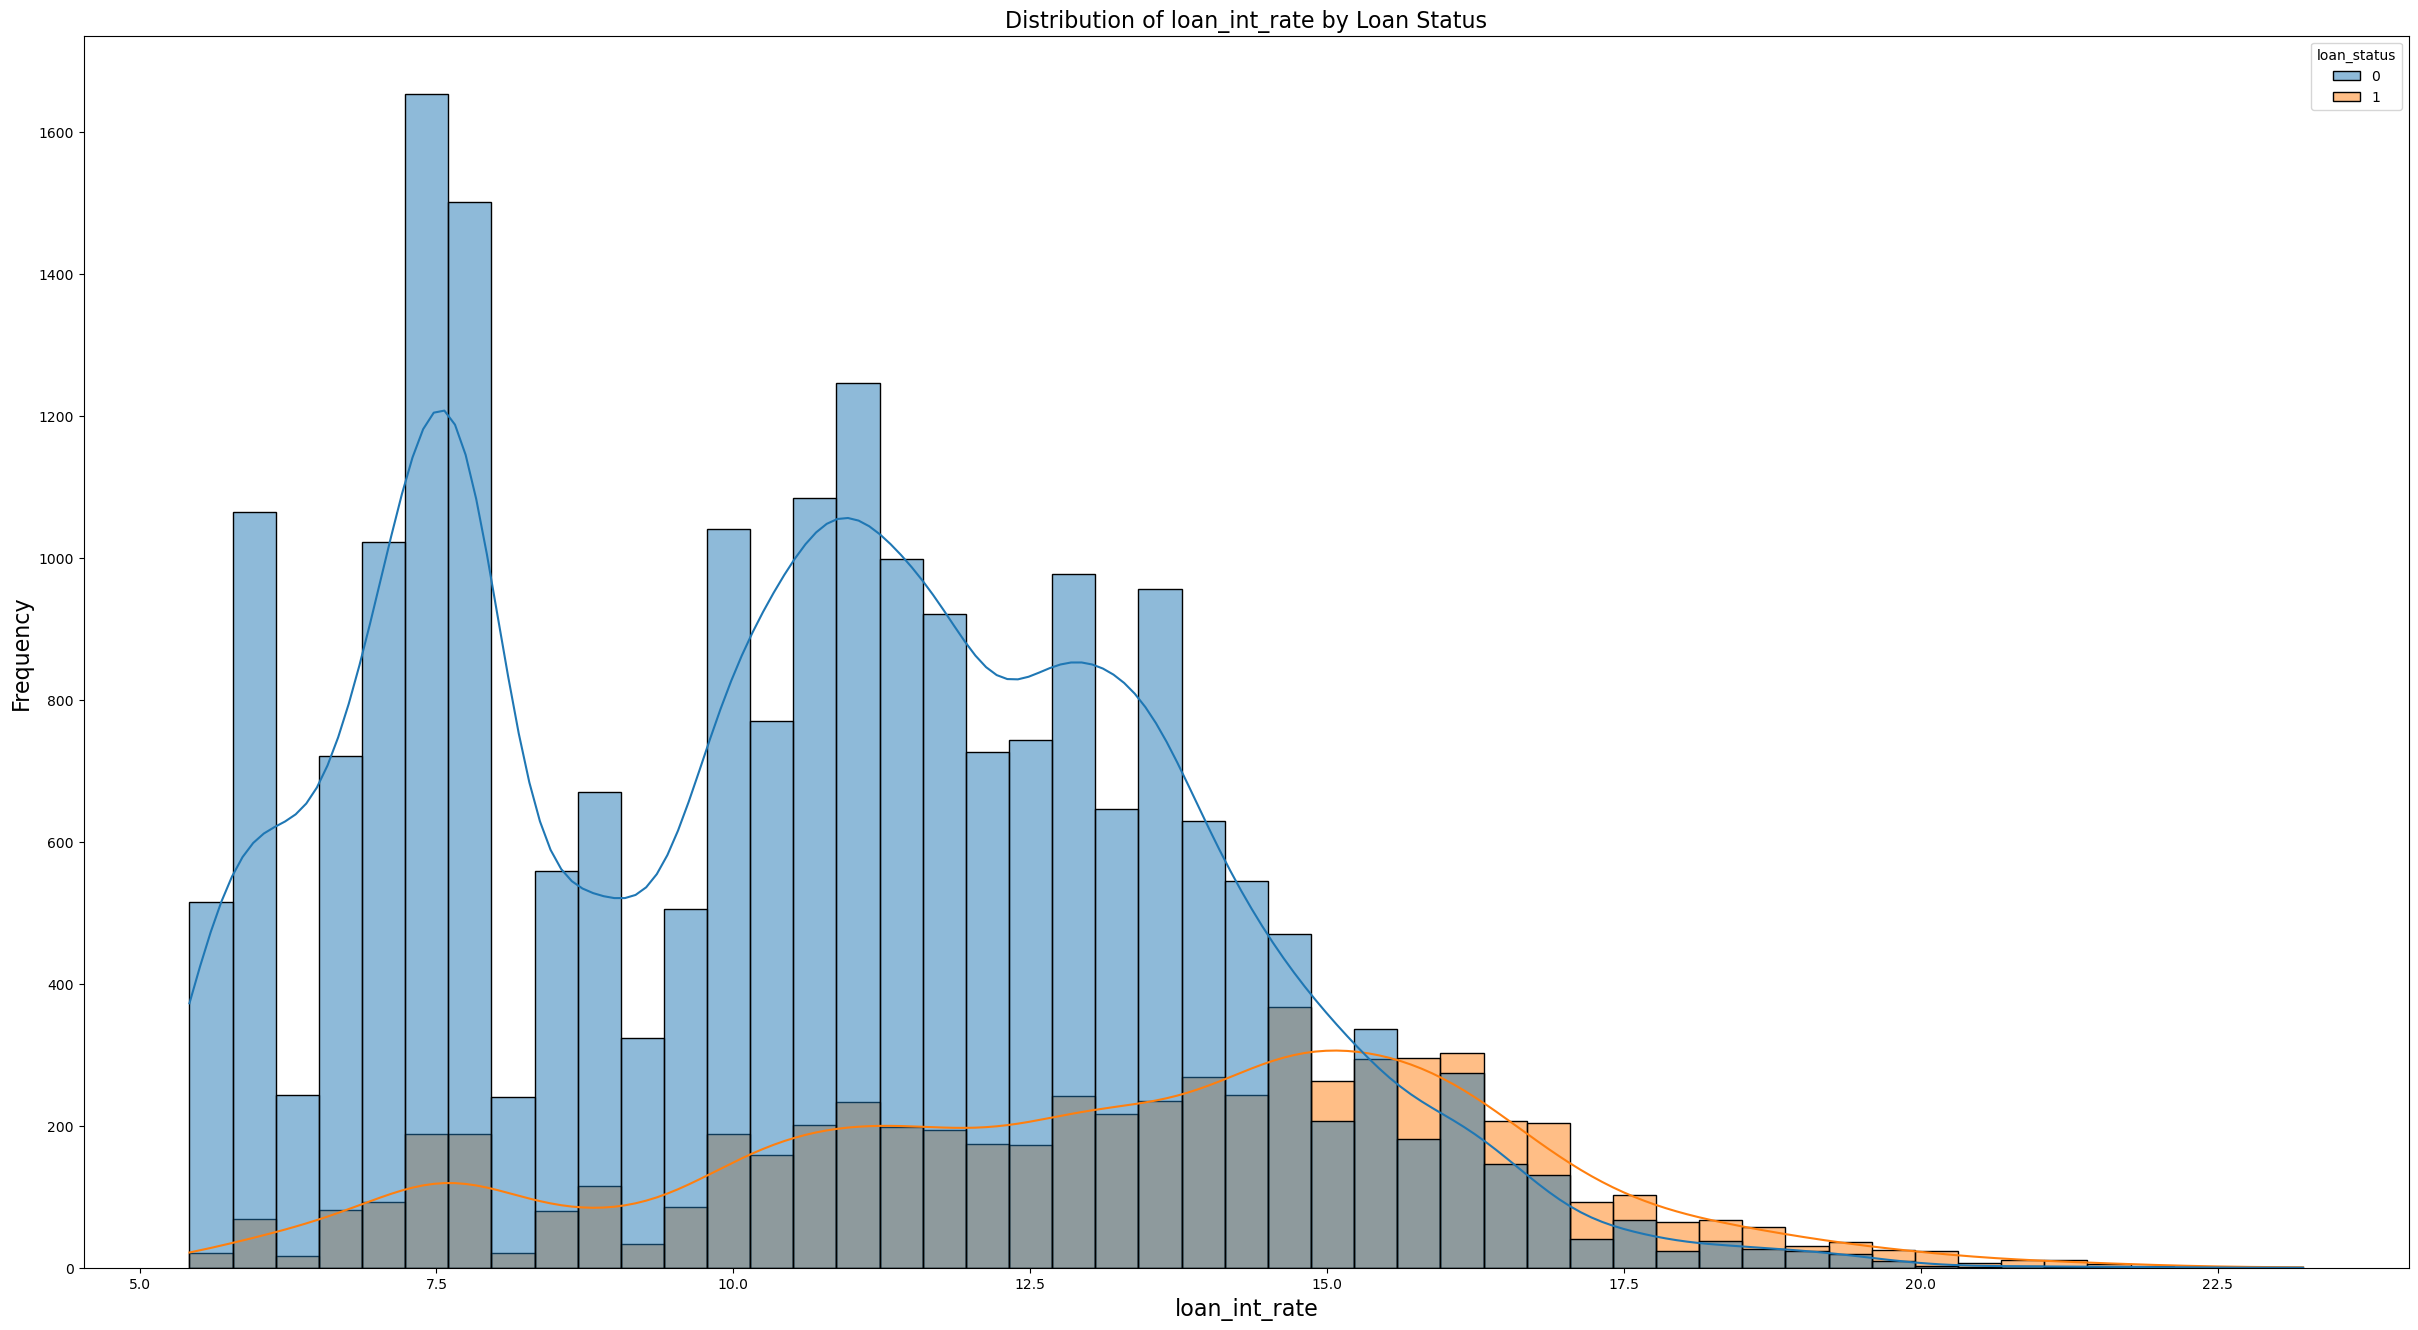

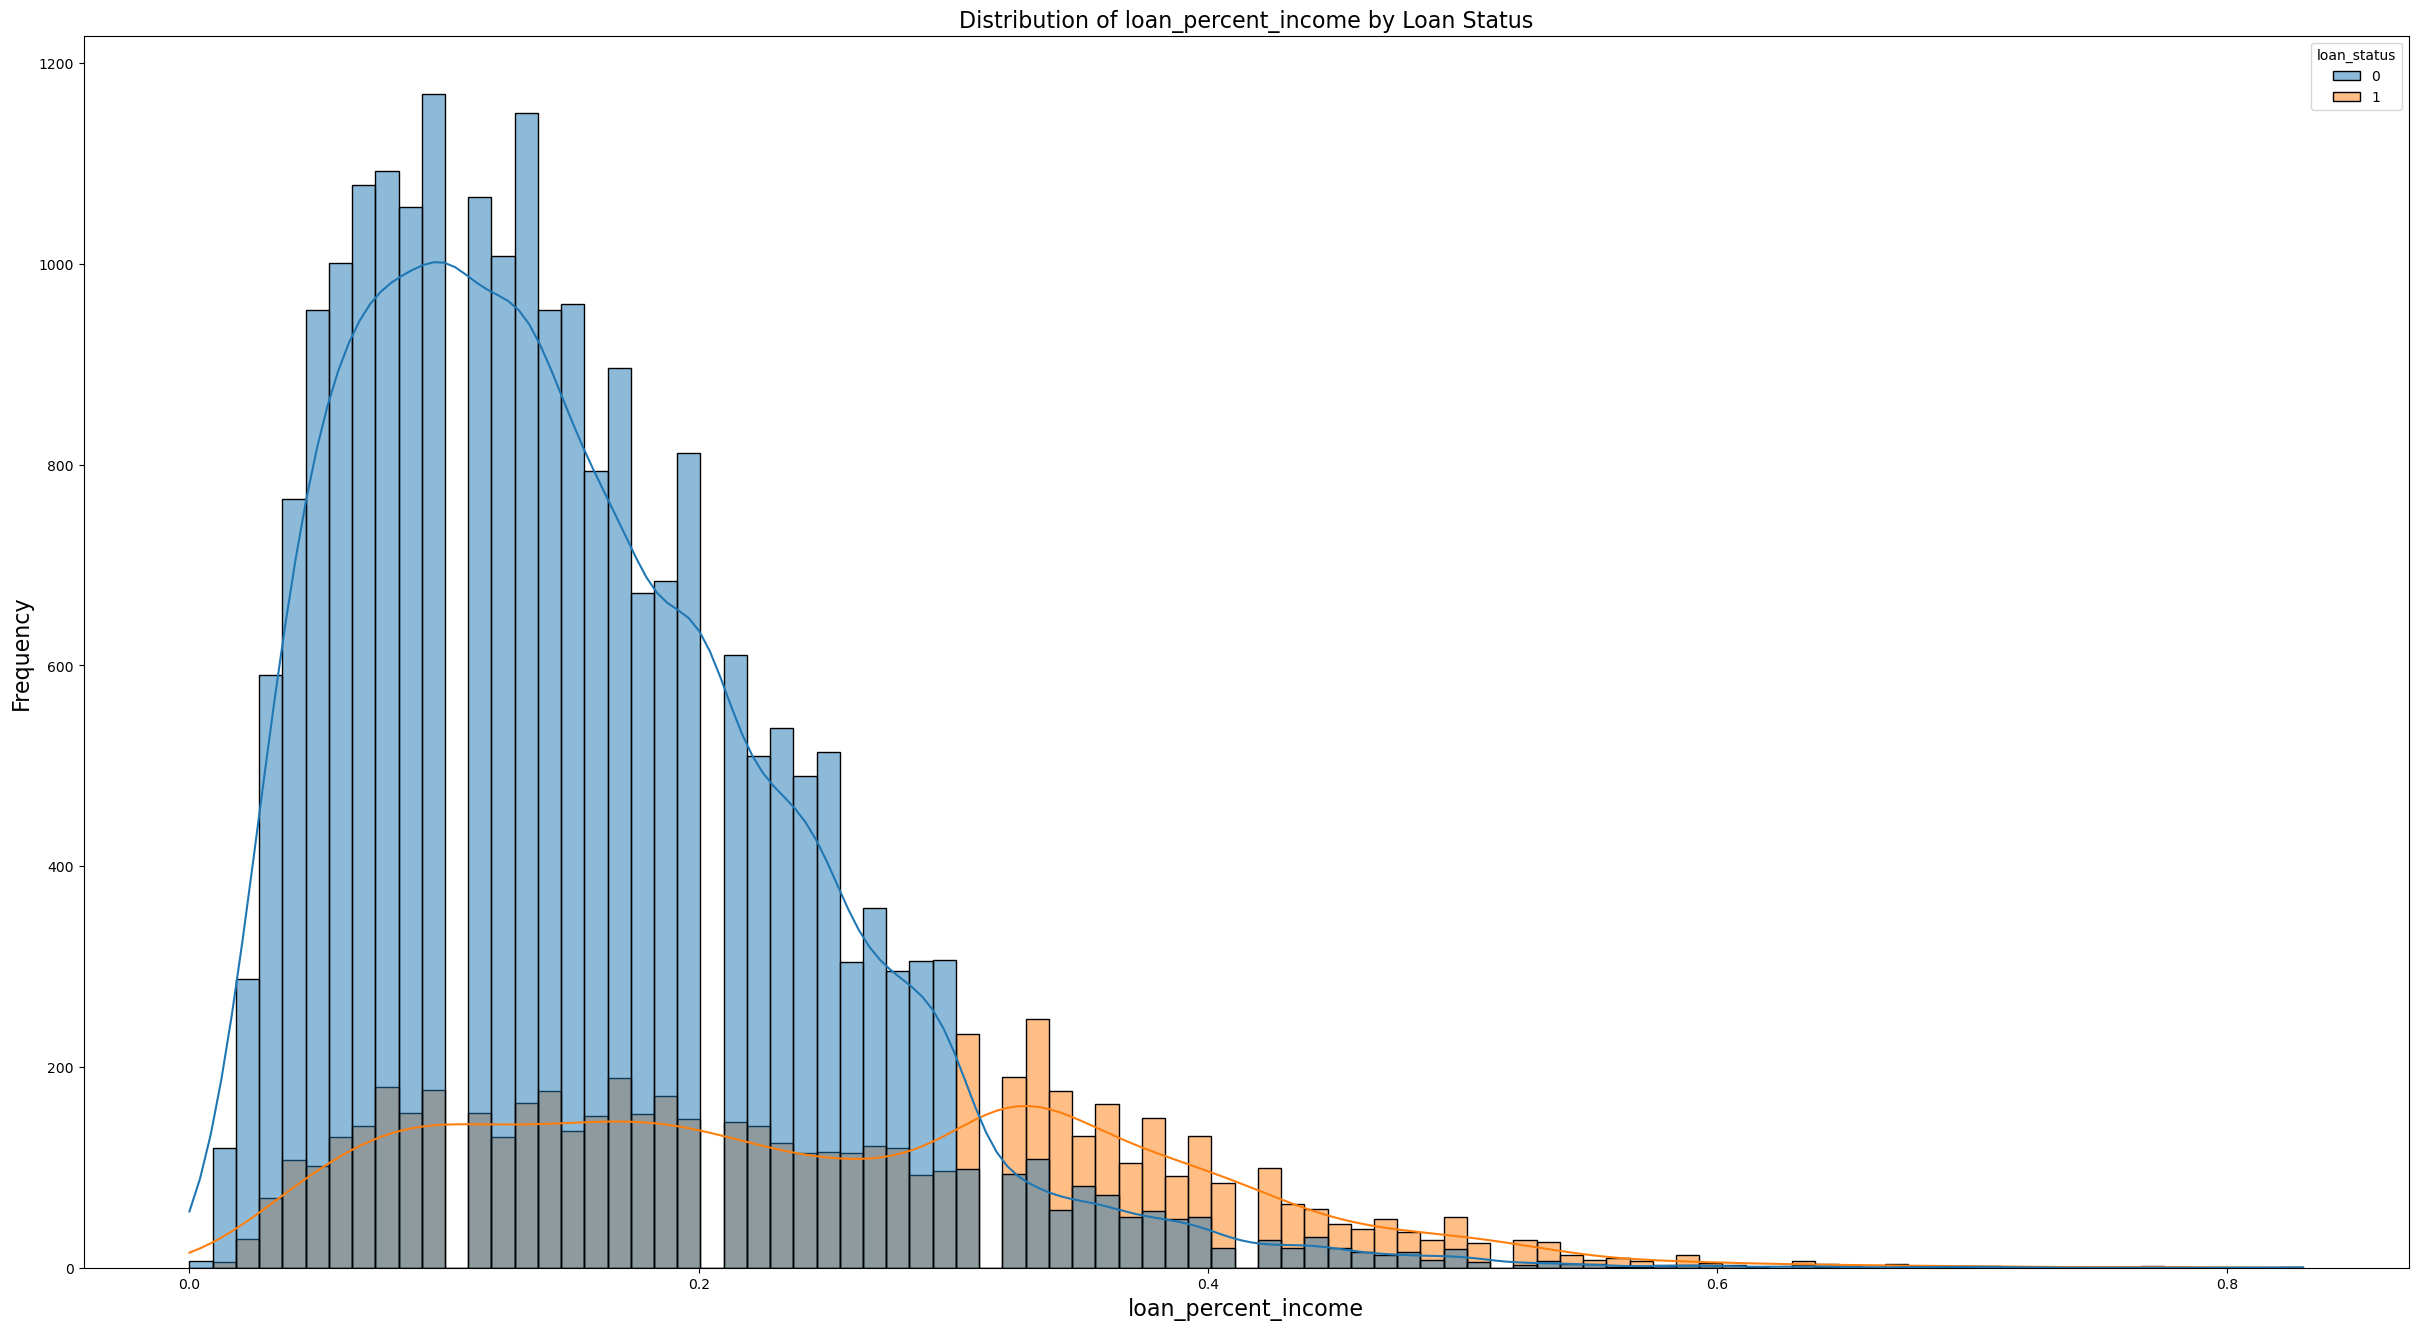

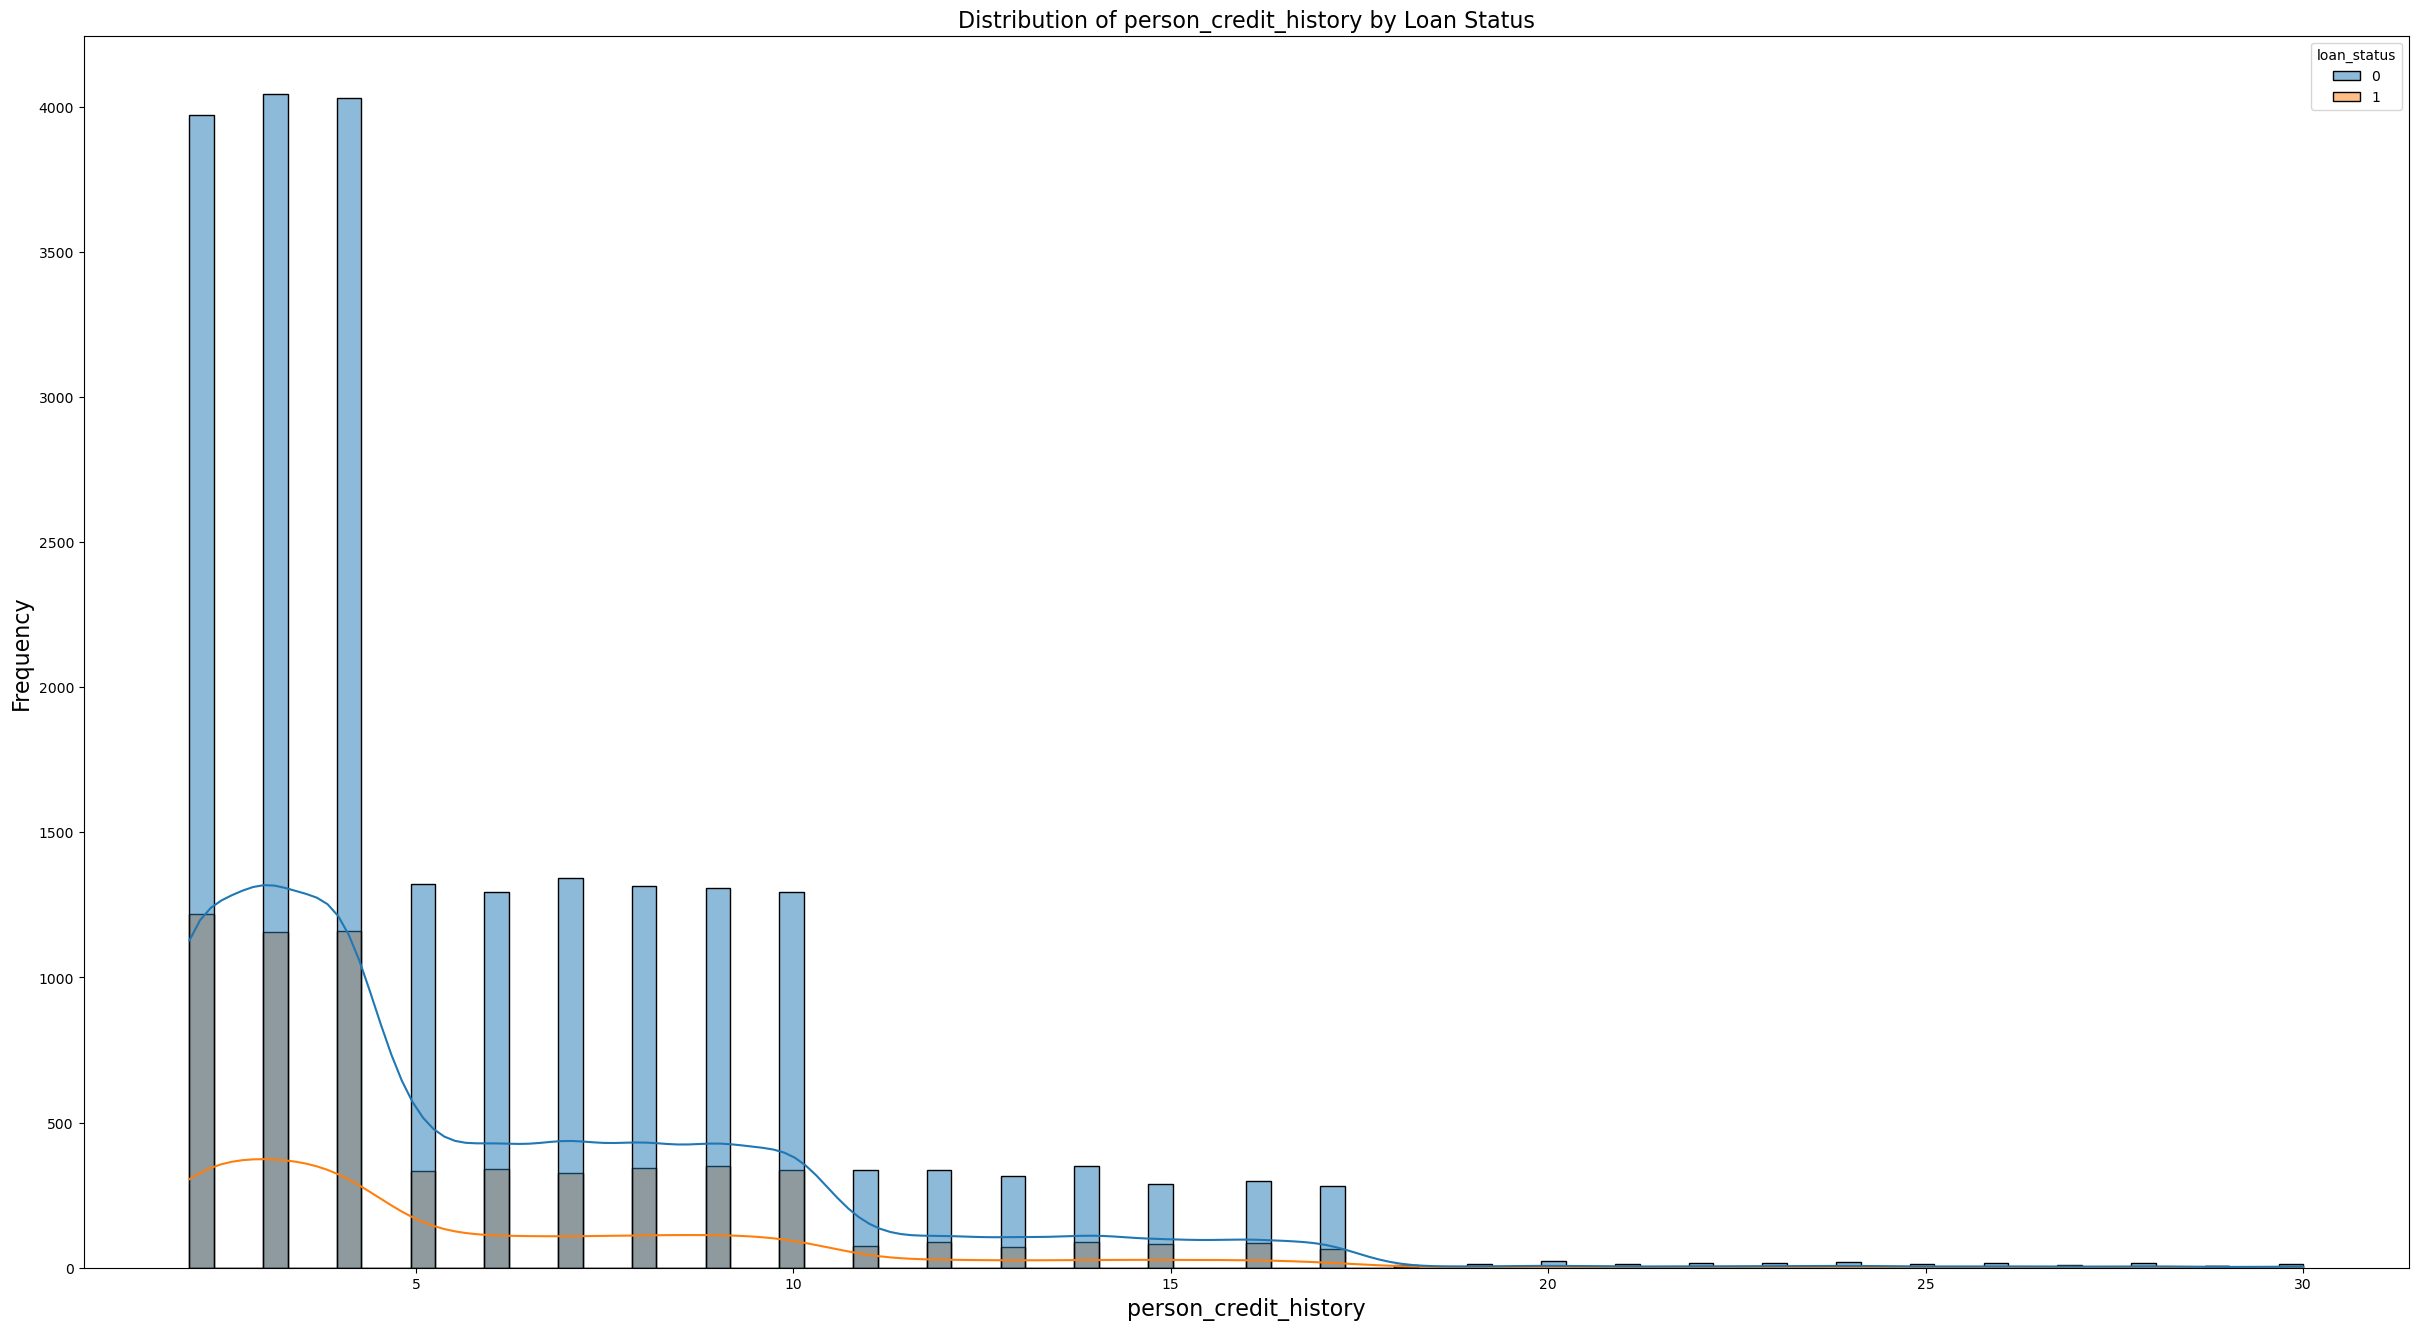

In [20]:
for feature in numeric_features:
    plt.figure(figsize=(30, 16))
    sns.histplot(data=df, x=feature, hue='loan_status', kde=True)
    plt.title(f'Distribution of {feature} by Loan Status', fontsize=16)
    plt.xlabel(feature, fontsize=16)
    plt.ylabel('Frequency', fontsize=16)
    plt.show()

    '''From the histograms depicting the distribution of 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
    a notable trend emerges: as the loan amount increases, the proportion of defaults (depicted by the yellow line) also rises, 
    eventually converging with the non-defaults (blue line) at higher values. This convergence suggests that loan amount may indeed 
    influence default status significantly. Conversely, for features where the lines remain parallel or do not show clear convergence 
    or divergence across different values, such as age or income, these factors may not exert a significant influence on default probability.

    Moreover, the histograms suggest that loan interest rate, loan amount, and loan percentage of income exhibit distinct distributions
    between default and non-default cases. The pronounced shifts in these features' distributions imply they could be pivotal in predicting
    default probability, highlighting their potential as key contributors in the model.

    This visual exploration underscores the importance of these variables in understanding and predicting loan defaults, 
    suggesting avenues for further investigation and model refinement.'''

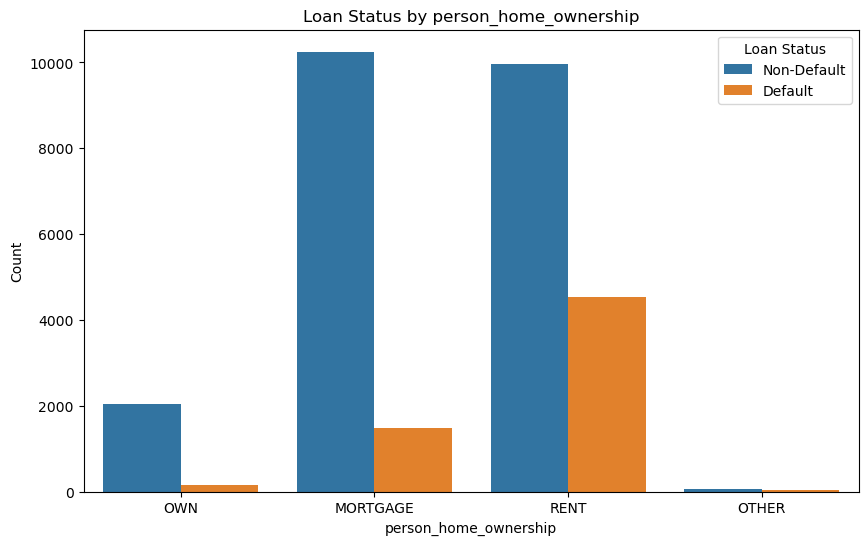

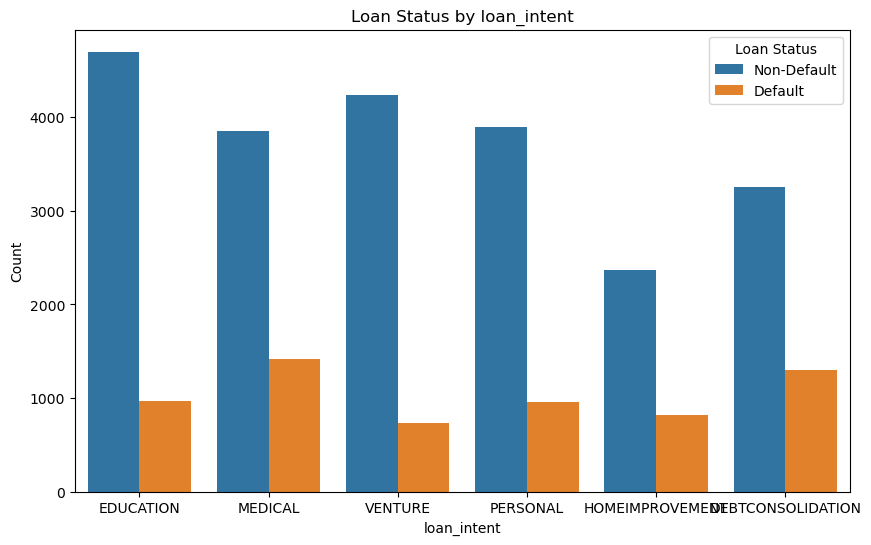

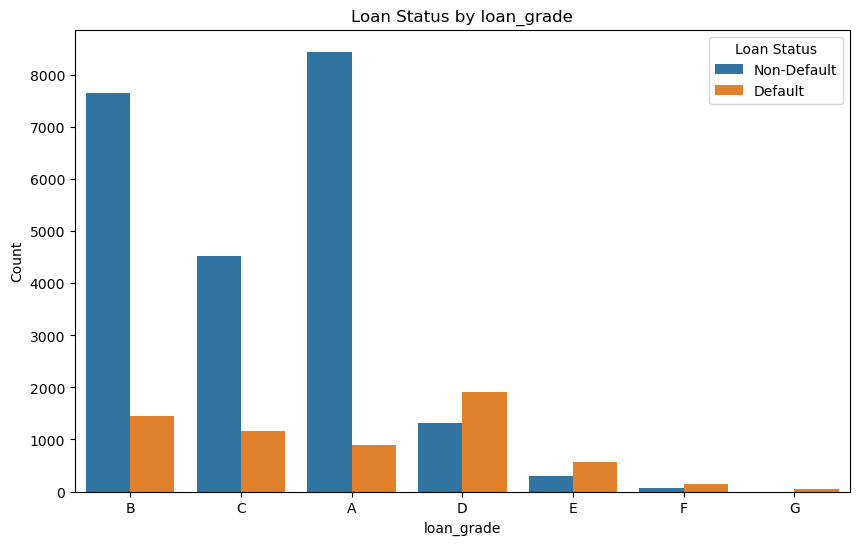

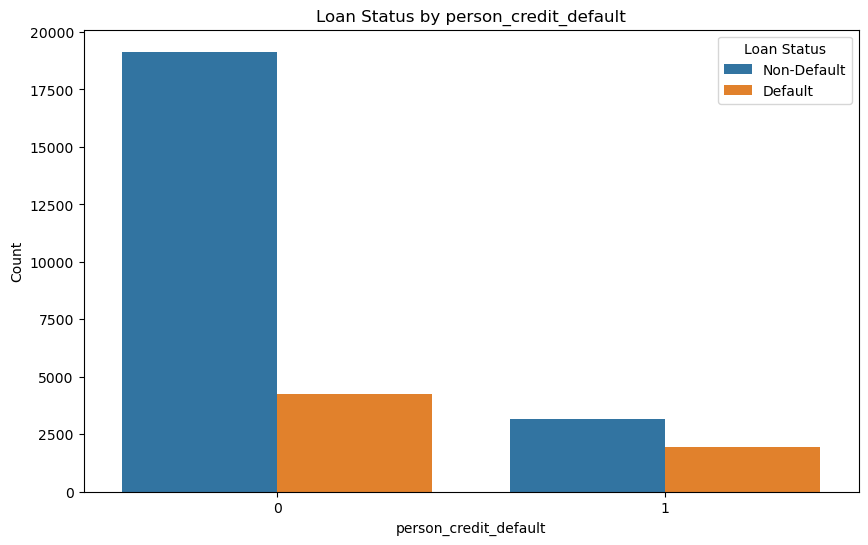

In [18]:


for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, hue='loan_status', data=df)
    plt.title(f'Loan Status by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Loan Status', labels=['Non-Default', 'Default'])
    plt.show()

    '''The count plots illustrating loan status across categorical features reveal notable insights into their impact on loan default probability. 
    Among these features, loan grade stands out prominently, displaying distinct variations in default rates across different grade categories. 
    Specifically, higher loan grades exhibit lower default frequencies, indicating a strong negative correlation between grade and default probability. 
    Conversely, while other categorical features such as home ownership type and loan intent also demonstrate varying default rates, their impact appears 
    comparatively less pronounced than that of loan grade. This observation underscores the significance of including loan grade as a critical predictor in our model, 
    suggesting it plays a pivotal role in predicting and understanding loan default behavior.'''

In [7]:


# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent', 'loan_grade'],drop_first=True)
X = df_encoded.drop('loan_status', axis=1) 
y = df_encoded['loan_status']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(class_weight='balanced',random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
'''Trying to fit this model resulted in a warning message  due to reaching the maximum number of iterations, which can be attributed to the need for scaling the data to improve convergence and model performance.'''

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      4461
           1       0.43      0.78      0.56      1238

    accuracy                           0.73      5699
   macro avg       0.68      0.75      0.68      5699
weighted avg       0.81      0.73      0.75      5699



c:\Users\Jimmy\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


'Trying to fit this model resulted in a warning message  due to reaching the maximum number of iterations, which can be attributed to the need for scaling the data to improve convergence and model performance.'

In [8]:

# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent', 'loan_grade'],drop_first=True)

# select the independant variables and the dependant variable
X = df_encoded.drop('loan_status', axis=1)
y = df_encoded['loan_status']

# Scale the independant variables
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert scaled array back to DataFrame 
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index) 
# print(X_scaled.head())
y = y.loc[X_scaled.index]

# Display statsmodels logistic regression on entire dataset to get a summary of 
X_scaled_sm = sm.add_constant(X_scaled)
model_sm = sm.Logit(y, X_scaled_sm)
result = model_sm.fit()
print(result.summary())

"""
This code performs logistic regression using statsmodels on a dataset that has 
been preprocessed with MinMaxScaler for feature scaling. Key insights from the 
summary are as follows:

- The model achieves a Pseudo R-squared value of 0.3584, indicating that it 
  explains a significant portion of the variance in loan_status.
  
- Significant predictors influencing loan_status include loan_amnt, 
  loan_percent_income, and loan_int_rate, supported by their low p-values 
  (< 0.05) and substantial coefficients.
  
- Variables such as person_age, person_income, and person_emp_length also 
  contribute to predicting loan_status, albeit with comparatively smaller 
  effects relative to other predictors.

- Categorical features such as person_home_ownership and loan_intent exhibit 
  varying impacts on loan_status across different categories, demonstrating 
  statistically significant effects for certain categories.
  
- The logistic regression model exhibits robust performance based on the 
  log-likelihood and LLR p-value (< 0.001), indicating its superiority over 
  the null model.

These findings provide valuable insights into the factors influencing loan 
defaults and non-defaults, offering actionable intelligence for risk assessment 
and strategic decision-making in lending practices.
"""


Optimization terminated successfully.
         Current function value: 0.335702
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                28495
Model:                          Logit   Df Residuals:                    28472
Method:                           MLE   Df Model:                           22
Date:                Sun, 23 Jun 2024   Pseudo R-squ.:                  0.3584
Time:                        13:56:20   Log-Likelihood:                -9565.8
converged:                       True   LL-Null:                       -14910.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -3.9821      0.094    -42.420      0.000   

'\nThis code performs logistic regression using statsmodels on a dataset that has \nbeen preprocessed with MinMaxScaler for feature scaling. Key insights from the \nsummary are as follows:\n\n- The model achieves a Pseudo R-squared value of 0.3584, indicating that it \n  explains a significant portion of the variance in loan_status.\n  \n- Significant predictors influencing loan_status include loan_amnt, \n  loan_percent_income, and loan_int_rate, supported by their low p-values \n  (< 0.05) and substantial coefficients.\n  \n- Variables such as person_age, person_income, and person_emp_length also \n  contribute to predicting loan_status, albeit with comparatively smaller \n  effects relative to other predictors.\n\n- Categorical features such as person_home_ownership and loan_intent exhibit \n  varying impacts on loan_status across different categories, demonstrating \n  statistically significant effects for certain categories.\n  \n- The logistic regression model exhibits robust per

In [9]:

# check multicollinearity among the predictors
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

'''
- 'person_age': High VIF (56.911) suggests strong multicollinearity with other 
  predictors, indicating that age might be closely correlated with other 
  variables in the dataset.

- 'person_income': Moderate VIF (4.881) indicates moderate correlation with 
  other predictors, suggesting potential collinearity issues.

- 'person_emp_length': Low VIF (2.662) suggests minimal collinearity with 
  other predictors.

- 'loan_amnt': High VIF (8.849) suggests significant multicollinearity with 
  other predictors, particularly loan_int_rate and loan_percent_income.

- 'loan_int_rate': Very high VIF (70.741) indicates severe multicollinearity 
  issues with other predictors, suggesting that loan_int_rate is strongly 
  correlated with multiple variables in the dataset.

- 'loan_percent_income': High VIF (8.845) indicates substantial 
  multicollinearity with other predictors, particularly loan_amnt and 
  loan_int_rate.

- Categorical variables such as 'person_credit_default', 'person_credit_history', 
  'person_home_ownership', 'loan_intent', and 'loan_grade' show varying levels 
  of collinearity, with VIF values generally indicating acceptable levels of 
  multicollinearity.

Overall, high VIF values (greater than 10) for 'person_age', 'loan_amnt', 
'loan_int_rate', 'loan_percent_income', and 'person_credit_history' indicate 
potential issues with multicollinearity that may affect the accuracy and 
interpretability of regression coefficients. Addressing multicollinearity 
through feature selection or regularization techniques could improve the 
reliability of the regression model.

Note: The high variance inflation factor (VIF) observed for loan_int_rate is 
probably due to the fact that interest rates are determined based on loan grades.
This correlation suggests that including both variables in the model 
may lead to instability or redundancy in coefficient estimates.

'''

                        feature        VIF
0                    person_age  56.911308
1                 person_income   4.880622
2             person_emp_length   2.661828
3                     loan_amnt   8.848534
4                 loan_int_rate  70.741361
5           loan_percent_income   8.844967
6         person_credit_default   2.026621
7         person_credit_history  10.004591
8   person_home_ownership_OTHER   1.010612
9     person_home_ownership_OWN   1.238510
10   person_home_ownership_RENT   2.602304
11        loan_intent_EDUCATION   2.171802
12  loan_intent_HOMEIMPROVEMENT   1.695392
13          loan_intent_MEDICAL   2.115237
14         loan_intent_PERSONAL   2.026210
15          loan_intent_VENTURE   2.064332
16                 loan_grade_B   4.627577
17                 loan_grade_C   6.555951
18                 loan_grade_D   5.831955
19                 loan_grade_E   2.763247
20                 loan_grade_F   1.557302
21                 loan_grade_G   1.206850


"\n- 'person_age': High VIF (56.911) suggests strong multicollinearity with other \n  predictors, indicating that age might be closely correlated with other \n  variables in the dataset.\n\n- 'person_income': Moderate VIF (4.881) indicates moderate correlation with \n  other predictors, suggesting potential collinearity issues.\n\n- 'person_emp_length': Low VIF (2.662) suggests minimal collinearity with \n  other predictors.\n\n- 'loan_amnt': High VIF (8.849) suggests significant multicollinearity with \n  other predictors, particularly loan_int_rate and loan_percent_income.\n\n- 'loan_int_rate': Very high VIF (70.741) indicates severe multicollinearity \n  issues with other predictors, suggesting that loan_int_rate is strongly \n  correlated with multiple variables in the dataset.\n\n- 'loan_percent_income': High VIF (8.845) indicates substantial \n  multicollinearity with other predictors, particularly loan_amnt and \n  loan_int_rate.\n\n- Categorical variables such as 'person_credit

Compare the outcomes of two models: one utilizing balanced weights and the other employing default weights. Given the dataset's imbalance between default and non-default records, applying the balanced parameter reduced the model's accuracy overall but increased the model's ability to predict default cases which is what we are looking for and has more value in our model.
the first model (default approach) provides higher accuracy and better performance metrics for non-default cases (higher precision, recall, and F1-score).
the second model (balanced approach) shows higher recall for default cases, which means it identifies more true positive default cases relative to the first model.

In [21]:
# model 1 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit logistic regression model on training data
model = LogisticRegression( random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Evaluate model performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      4461
           1       0.77      0.55      0.64      1238

    accuracy                           0.87      5699
   macro avg       0.83      0.75      0.78      5699
weighted avg       0.86      0.87      0.86      5699



In [28]:
# model 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Fit logistic regression model on training data
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Evaluate model performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88      4461
           1       0.56      0.79      0.66      1238

    accuracy                           0.82      5699
   macro avg       0.75      0.81      0.77      5699
weighted avg       0.85      0.82      0.83      5699



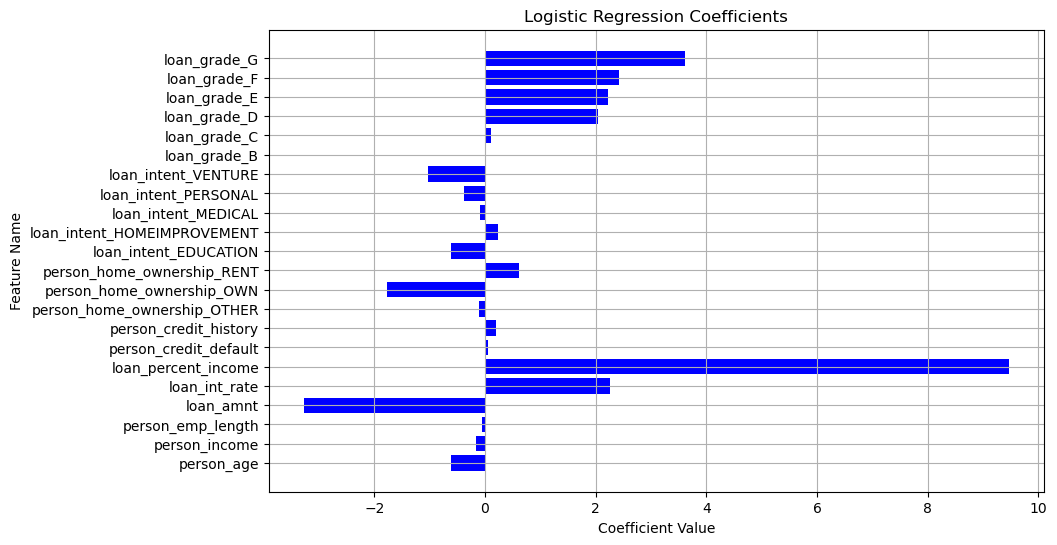

In [30]:
import matplotlib.pyplot as plt

# Extract coefficients and feature names
coefficients = model.coef_[0]
feature_names = list(X.columns)

# Plotting coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients, color='b')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Name')
plt.title('Logistic Regression Coefficients')
plt.grid(True)
plt.show()